In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [52]:
def f(x):
    return 3*x**2 -4*x +5

In [53]:
f(5.0)

60.0

In [54]:
xs  = np.arange(-10,10,0.25)
print(xs)

[-10.    -9.75  -9.5   -9.25  -9.    -8.75  -8.5   -8.25  -8.    -7.75
  -7.5   -7.25  -7.    -6.75  -6.5   -6.25  -6.    -5.75  -5.5   -5.25
  -5.    -4.75  -4.5   -4.25  -4.    -3.75  -3.5   -3.25  -3.    -2.75
  -2.5   -2.25  -2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25
   0.     0.25   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25
   2.5    2.75   3.     3.25   3.5    3.75   4.     4.25   4.5    4.75
   5.     5.25   5.5    5.75   6.     6.25   6.5    6.75   7.     7.25
   7.5    7.75   8.     8.25   8.5    8.75   9.     9.25   9.5    9.75]


In [55]:
plot = f(xs)

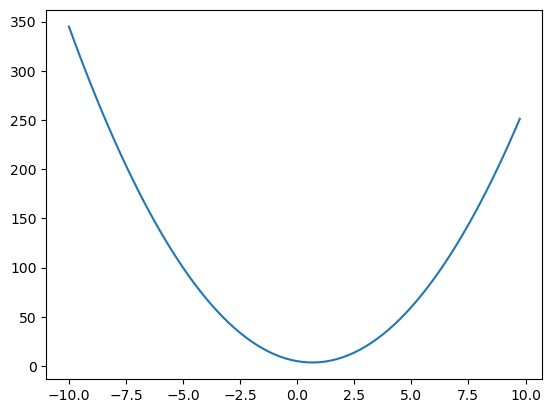

In [56]:
plt.plot(xs,plot)
plt.show()


In [57]:
h  = -0.0000000001
x = 3 
(f(x+h) -f(x))/h

14.000001158365194

In [58]:
a=2.0
b= -3.0
c=10.0
d= a*b +c
print(d)

4.0


In [59]:
h = 0.0001
a=2.0
b= -3.0
c=10.0

d1= a*b +c
c +=h
d2 = a*b +c

print("d1",d1)
print("d2",d2)
print("slop",(d2-d1)/h)

d1 4.0
d2 4.0001
slop 0.9999999999976694


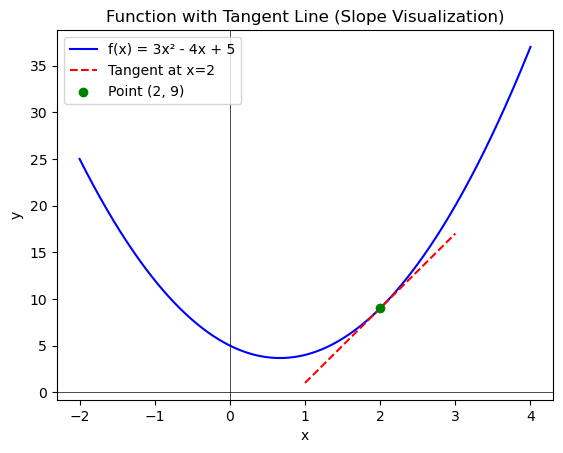

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = 3x^2 - 4x + 5
def f(x):
    return 3*x**2 - 4*x + 5

# Derivative f'(x) = 6x - 4
def derivative(x):
    return 6*x - 4

# Choose a point to find the slope
x_point = 2
y_point = f(x_point)
slope = derivative(x_point)

# Generate x values
x = np.linspace(-2, 4, 400)
y = f(x)

# Tangent line equation: y = m(x - x0) + y0
tangent_x = np.linspace(x_point - 1, x_point + 1, 100)
tangent_y = slope * (tangent_x - x_point) + y_point

# Plot the function
plt.plot(x, y, label="f(x) = 3x² - 4x + 5", color="blue")

# Plot the tangent line
plt.plot(tangent_x, tangent_y, label=f"Tangent at x={x_point}", color="red", linestyle="dashed")

# Mark the point of tangency
plt.scatter(x_point, y_point, color="green", zorder=3, label=f"Point ({x_point}, {y_point})")

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function with Tangent Line (Slope Visualization)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()

plt.show()


In [61]:
#nueral
class Value:
    def __init__(self,data,_children=(),_opt ="",label=""):
        self.data = data
        self.prev= set(_children)
        self._op= _opt
        self._label =label

    def __repr__(self):
        return f"Value(data={self.data})"
      
    def __add__(self,other):
        newVal = Value(self.data +other.data,(self,other),"+")
        return newVal
    
    def __mul__(self,other):
        newVal =Value(self.data *other.data,(self,other),"*")
        return newVal


a = Value(2.0,label="a")
b = Value(-3.0,label="b")
c= Value(10,label="c")
e= a*b;  e._label="e"

d =e+c ;d._label="d"


In [ ]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                build(child)
    
    build(root)  # Correctly indented outside the build function
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        # Handle both float and non-float data types
  
        dot_label = f" {n._label} data: {n.data:.4f}" if isinstance(n.data, float) else f"{n._label} data: {n.data} "

        dot.node(name=uid, label=dot_label, shape='record')
        
        if hasattr(n, '_op') and n._op:
            op_id = uid + n._op
            dot.node(name=op_id, label=n._op)
            dot.edge(op_id, uid)
    
    for n1, n2 in edges:
        if hasattr(n2, '_op') and n2._op:
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        else:
            dot.edge(str(id(n1)), str(id(n2)))
    
    return dot

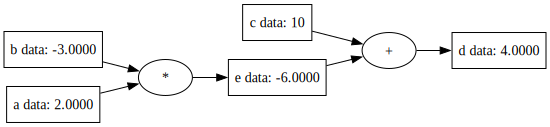

In [80]:


draw_dot(d)